# Challenge: Processing of Tabular Data 

__Import Statements__

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Read the data

> ### Challenge: Read the `IHME_GBD_2016_POPULATION_ESTIMATES_1990_2016_Y2017M09D14.CSV` file stored in the `../data/` folder and store it to a variable namend `pop`. _Hint: Use the_ `pd.read_csv` _function._ 

In [2]:
## your code here
pop = pd.read_csv("../data/IHME_GBD_2016_POPULATION_ESTIMATES_1990_2016_Y2017M09D14.CSV")
pop

,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,pop
0,1,Global,1,Male,1,Under 5,1990,3.073378e+08
1,1,Global,2,Female,1,Under 5,1990,2.911299e+08
2,1,Global,3,Both,1,Under 5,1990,5.984677e+08
3,1,Global,1,Male,1,Under 5,1991,3.089656e+08
4,1,Global,2,Female,1,Under 5,1991,2.921822e+08
...,...,...,...,...,...,...,...,...
603931,44639,Middle SDI,2,Female,235,95 plus,2015,3.984956e+05
603932,44639,Middle SDI,3,Both,235,95 plus,2015,5.625882e+05
603933,44639,Middle SDI,1,Male,235,95 plus,2016,1.766505e+05
603934,44639,Middle SDI,2,Female,235,95 plus,2016,4.302028e+05


In [3]:
# %load ../src/_solutions/tab_data01.py

## Inspect the data

> ### Challenge: Inspect the data by 
* printing the column names
* counting the number of unique entries in the `location_name` column
* printing some location names
* figuring out the unique categories for the `sex_name` and `age_group` columns



### Exploratory Data Analysis

* printing the column names

In [4]:
## your code here
pop.columns

Index(['location_id', 'location_name', 'sex_id', 'sex_name', 'age_group_id',
       'age_group_name', 'year_id', 'pop'],
      dtype='object')

* counting the number of unique entries in the `location_name` column

In [5]:
## your code here
pop["location_name"].nunique()

231

* printing some location names

In [6]:
## your code here
pop["location_name"].sample(10)

267801                               The Bahamas
461473                                Madagascar
279546                                  Dominica
382355                                      Oman
4900      Southeast Asia, East Asia, and Oceania
535522                                   Liberia
215828                                     Italy
285363                                    Guyana
517477                                Cape Verde
119337                                 Macedonia
Name: location_name, dtype: object

* figuring out the unique categories for the `sex_name` and `age_group` columns

In [7]:
## your code here
pop["sex_name"].unique()

array(['Male', 'Female', 'Both'], dtype=object)

In [8]:
## your code here
pop["age_group_name"].unique()

array(['Under 5', 'Early Neonatal', 'Late Neonatal', 'Post Neonatal',
       '1 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29',
       '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54',
       '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79',
       'All Ages', '5-14 years', '15-49 years', '50-69 years',
       '70+ years', '<1 year', '80 to 84', '85 to 89', '90 to 94',
       '<20 years', '10-24 years', '95 plus'], dtype=object)

In [9]:
# %load ../src/_solutions/tab_data02.py

## Analyzing a subset of the dataset

> ### Challenge: Subset the data set based on age groups, location and sex as given below and save the resulting  data frame to a variable called `pop_subset`. 

__Subsetting__

In [10]:
ages = ['5-14 years', '15-49 years', '50-69 years','70+ years']
location = ["Germany", "France", "Italy"]
sex = ['Male', 'Female']

In [11]:
## your code here
cond = (
    pop["age_group_name"].isin(ages) & 
    pop["location_name"].isin(location) & 
    pop["sex_name"].isin(sex)
)

pop_subset = pop.loc[cond,:]
print(pop_subset.shape)
pop_subset.sample(5)

(648, 8)


,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,pop
204010,81,Germany,2,Female,24,15-49 years,2007,18932511.72
203953,81,Germany,2,Female,23,5-14 years,2015,3472927.37
216904,86,Italy,2,Female,23,5-14 years,2012,2718458.12
201535,80,France,2,Female,26,70+ years,1992,3534207.71
201502,80,France,2,Female,25,50-69 years,2008,7352088.01


In [12]:
# %load ../src/_solutions/tab_data03.py

### Split-Apply-Combine

![](_img/split-apply-combine.svg)
Image source: [Jake VanderPlas 2016, Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

> ### Challenge: Compute the population of Germany, Italy and France for the years 1990 to 2016. _Hint: Use the_ `groupby` _function._


In [13]:
## your code here
gb = pop_subset.groupby(["year_id", "location_name"])["pop"].sum()
gb

year_id  location_name
1990     France           52924678.45
         Germany          74905392.07
         Italy            53965720.67
1991     France           53204997.81
         Germany          75282202.61
                             ...     
2015     Germany          78112961.81
         Italy            57659331.41
2016     France           61020069.08
         Germany          78619000.77
         Italy            57960714.36
Name: pop, Length: 81, dtype: float64

In [14]:
# %load ../src/_solutions/tab_data04.py

## Plotting

> ### Challenge:    
Plot how the the population of Germany, Italy and France changed over the years 1990 to 2016. 

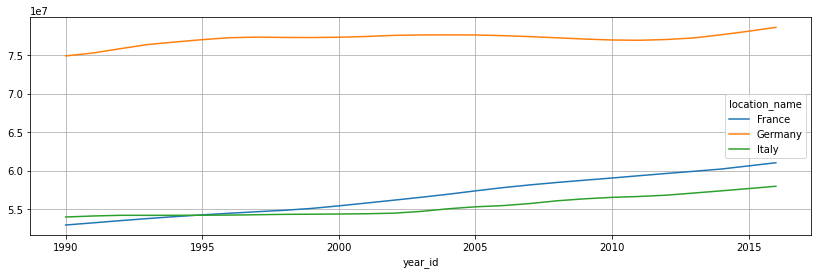

In [15]:
## your code here
gb.unstack().plot(figsize=(14,4))
plt.grid()

In [16]:
# %load ../src/_solutions/tab_data05.py

> ### Challenge: Redo the analysis from above but now include Spain in addition to Germany, Italy and France into the analysis.

## Solution:
- Append `'Spain'` into the location list and rerun the code above

In [17]:
location

['Germany', 'France', 'Italy']

In [18]:
location.append('Spain')
location

['Germany', 'France', 'Italy', 'Spain']

In [19]:
## your code here
cond = (
    pop["age_group_name"].isin(ages) & 
    pop["location_name"].isin(location) & 
    pop["sex_name"].isin(sex)
)

pop_subset = pop.loc[cond,:]
print(pop_subset.shape)
pop_subset.sample(5)

(864, 8)


,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,pop
201310,80,France,2,Female,23,5-14 years,1998,3682781.74
217018,86,Italy,2,Female,25,50-69 years,1996,6959415.53
201358,80,France,2,Female,23,5-14 years,2014,3874590.71
216969,86,Italy,1,Male,24,15-49 years,2007,13828699.00
216930,86,Italy,1,Male,24,15-49 years,1994,14475224.99


In [20]:
## your code here
gb = pop_subset.groupby(["year_id", "location_name"])["pop"].sum()
gb

year_id  location_name
1990     France           52924678.45
         Germany          74905392.07
         Italy            53965720.67
         Spain            36832506.47
1991     France           53204997.81
                             ...     
2015     Spain            44243841.58
2016     France           61020069.08
         Germany          78619000.77
         Italy            57960714.36
         Spain            44315872.48
Name: pop, Length: 108, dtype: float64

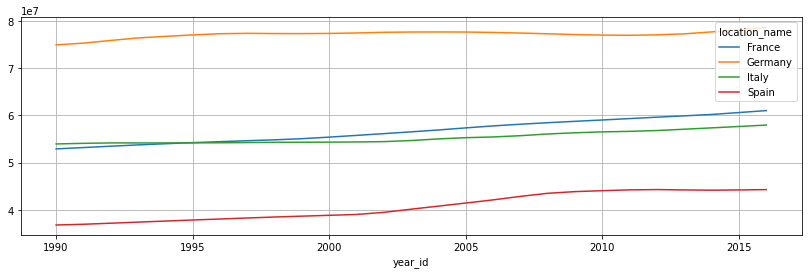

In [21]:
## your code here
gb.unstack().plot(figsize=(14,4))
plt.grid()

***